<a href="https://colab.research.google.com/github/heejjj/Heart_Attact_Predict/blob/main/Heart_Attack_Analysis_%26_Prediction_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%B2%98%EB%A6%AC_X_23_04_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ROCAUC
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('/content/drive/MyDrive/kaggle/Heart Attack Analysis & Prediction Dataset/heart.csv')


In [3]:
X = df.drop("output", axis=1)

In [4]:
y = df['output']

In [5]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=65)

##XGBoost

In [6]:
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance

In [7]:
#Train set
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 42,  learning_rate= 0.03, n_jobs=5)
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_train)
xgb = accuracy_score(y_train, pred_xgb)
print(xgb)

0.9917355371900827


In [8]:
#Test set
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 42,  learning_rate= 0.03, n_jobs=5)
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)
xgb = accuracy_score(y_test, pred_xgb)
print(xgb)

0.9016393442622951


<Axes: >

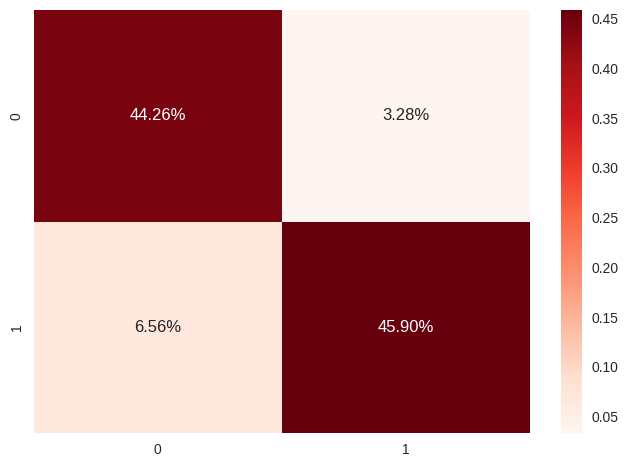

In [9]:
cm_xgb = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm_xgb/np.sum(cm_xgb), annot = True, fmt=  '0.2%', cmap = 'Reds')

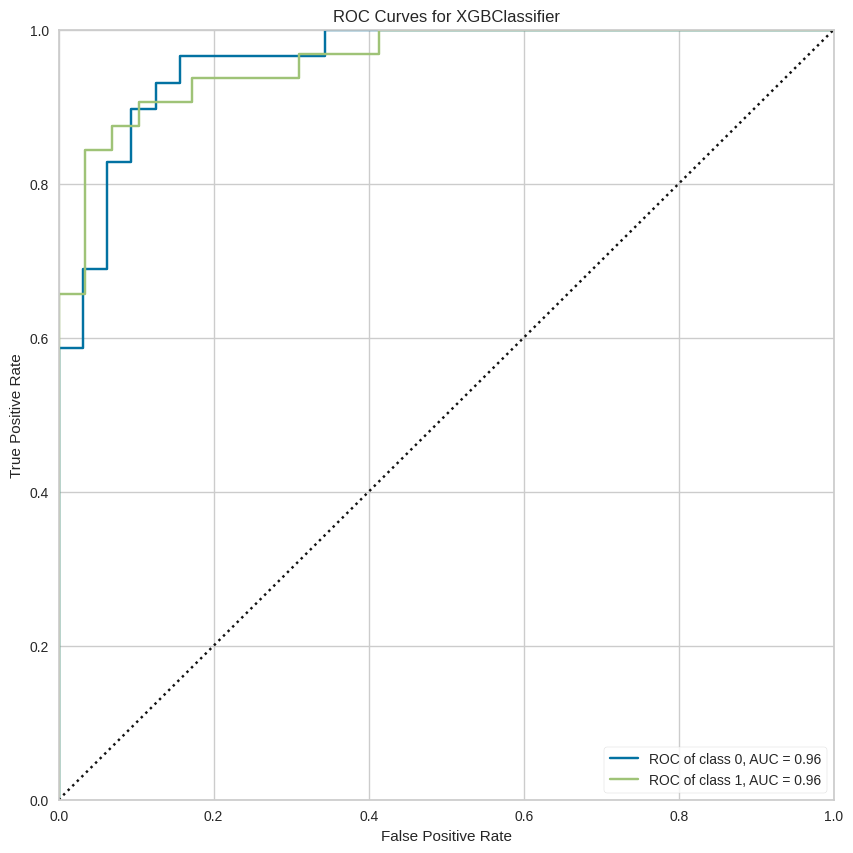

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [10]:
fig,ax= plt.subplots(figsize=(10,10))
roc_viz= ROCAUC(model_xgb,micro=False,macro=False, classes=["0", "1"])
roc_viz.fit(X_train,y_train)
roc_viz.score(X_test, y_test)
roc_viz.show()

<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Features'>

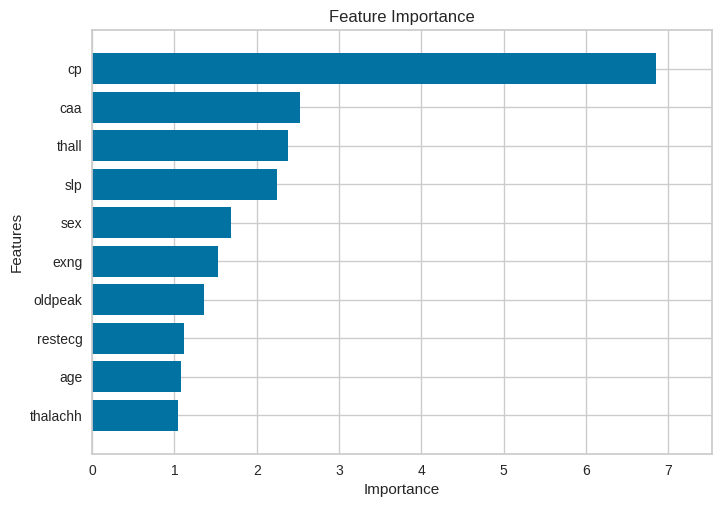

In [11]:
# feature importance 시각화
plot_importance(model_xgb, height=0.8, max_num_features=10, xlabel="Importance", 
                ylabel="Features", title="Feature Importance", show_values=False, importance_type='gain')

In [12]:
# !pip install shap

In [13]:
# #XGBoost Shap value

# import shap

# # SHAP explainer 생성
# explainer = shap.Explainer(model_xgb)

# # SHAP values 계산
# shap_values = explainer(X_train)

# # 모델 예측에 대한 SHAP 요약값 계산
# shap.summary_plot(shap_values, X_train)

# # 개별 샘플에 대한 SHAP 값 계산
# shap_values_single = explainer(X_train.iloc[0:1])

# # 개별 샘플에 대한 SHAP 값 시각화
# shap.plots.waterfall(shap_values_single[0], max_display=10)

##Kneighbor

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
#Train Set
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)
model_kn.fit(X_train, y_train)
pred_kn = model_kn.predict(X_train)
kn = accuracy_score(y_train, pred_kn)
print(kn)


0.6859504132231405


In [16]:
#Test Set
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)
model_kn.fit(X_train, y_train)
pred_kn = model_kn.predict(X_test)
kn = accuracy_score(y_test, pred_kn)
print(kn)


0.8360655737704918


<Axes: >

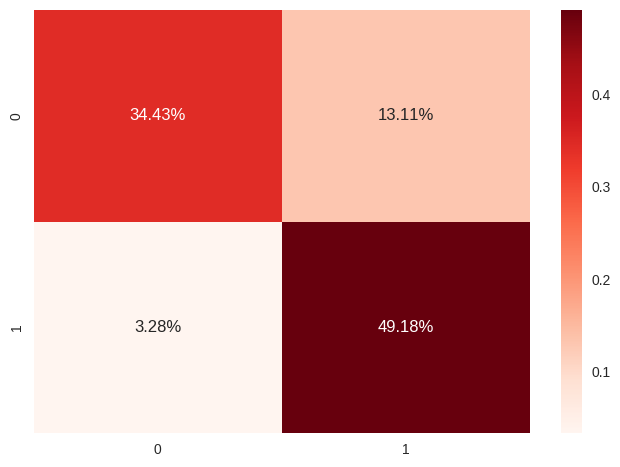

In [17]:
cm_kn = confusion_matrix(y_test, pred_kn)
sns.heatmap(cm_kn/np.sum(cm_kn), annot = True, fmt=  '0.2%', cmap = 'Reds')

##SVC

In [18]:
from sklearn.svm import SVC, LinearSVC

In [19]:
#Train set
model_svm = SVC(kernel='rbf', random_state = 42)
model_svm.fit(X_train, y_train)
pred_svm = model_svm.predict(X_train)
sv = accuracy_score(y_train, pred_svm)
print(sv)

0.6446280991735537


In [20]:
#Test set
model_svm = SVC(kernel='rbf', random_state = 42)
model_svm.fit(X_train, y_train)
pred_svm = model_svm.predict(X_test)
sv = accuracy_score(y_test, pred_svm)
print(sv)

0.7049180327868853


<Axes: >

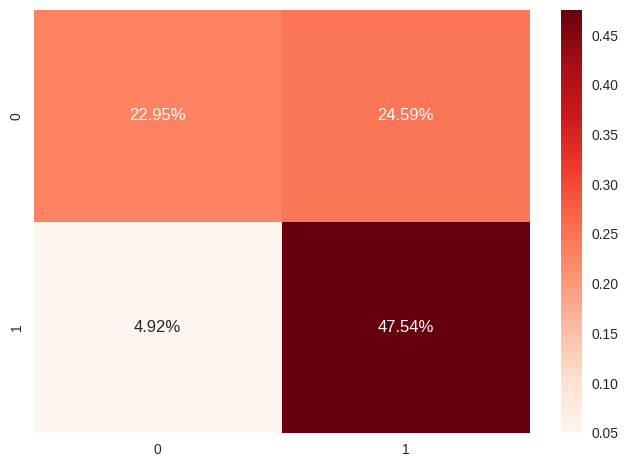

In [21]:
cm_sv = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm_sv/np.sum(cm_sv), annot = True, fmt=  '0.2%', cmap = 'Reds')

##Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
#Train set
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_train)
rf = accuracy_score(y_train, pred_rf)
print(rf)

0.8099173553719008


In [24]:
#Test set
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
rf = accuracy_score(y_test, pred_rf)
print(rf)

0.9672131147540983


<Axes: >

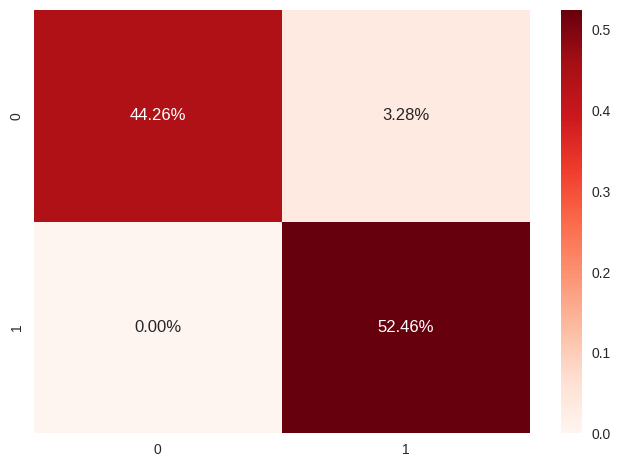

In [25]:
cm_rf = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm_rf/np.sum(cm_rf), annot = True, fmt=  '0.2%', cmap = 'Reds')

##Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
#Train set
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)
model_dt.fit(X_train,y_train)
pred_dt = model_dt.predict(X_train)
dt = accuracy_score(y_train, pred_dt)
print(dt)

0.859504132231405


In [28]:
#Test set
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)
model_dt.fit(X_train,y_train)
pred_dt = model_dt.predict(X_test)
dt = accuracy_score(y_test, pred_dt)
print(dt)

0.819672131147541


<Axes: >

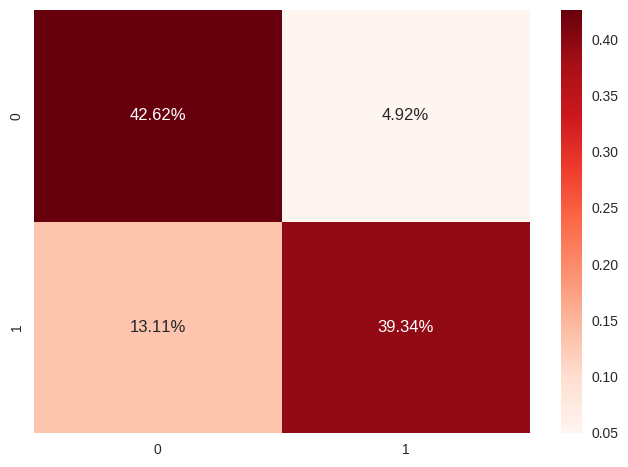

In [29]:
cm_dt = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm_dt/np.sum(cm_dt), annot = True, fmt=  '0.2%', cmap = 'Reds')

##Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
#Train set
model_lg = LogisticRegression(max_iter=120,random_state=42, n_jobs=20)
model_lg.fit(X_train, y_train)
pred_lg = model_lg.predict(X_test)
lg = accuracy_score(y_test, pred_lg)
print(lg)

0.9344262295081968


In [32]:
#Test set
model_lg = LogisticRegression(max_iter=120,random_state=42, n_jobs=20)
model_lg.fit(X_train, y_train)
pred_lg = model_lg.predict(X_test)
lg = accuracy_score(y_test, pred_lg)
print(lg)

0.9344262295081968


<Axes: >

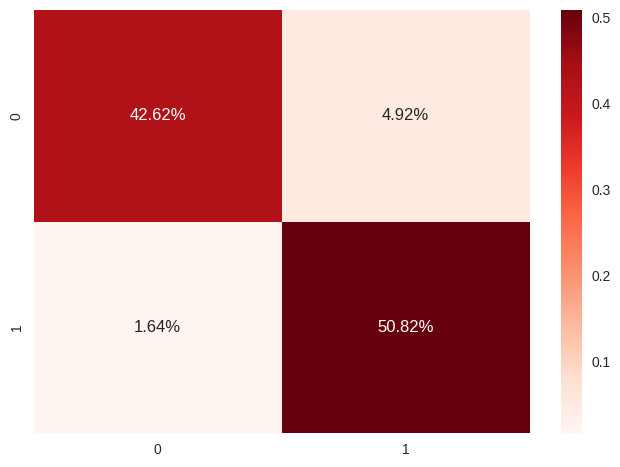

In [33]:
cm_lg = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm_lg/np.sum(cm_lg), annot = True, fmt=  '0.2%', cmap = 'Reds')

,Model,Accuracy_score
2,Random Forest,0.967213
0,Logistic Regression,0.934426
3,XGBoost,0.901639
4,KNeighbours,0.836066
1,Decision Tree,0.819672
5,SVC,0.704918


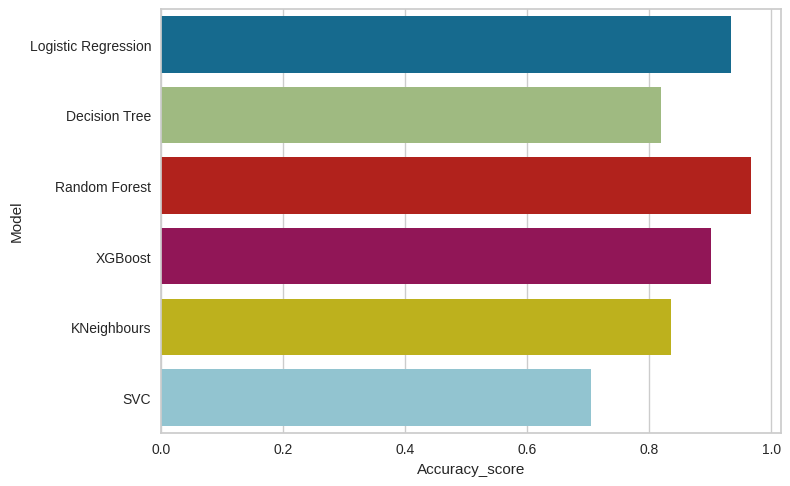

In [34]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'SVC'],
    'Accuracy_score' :[lg, dt, rf, xgb, kn, sv]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)